#### Imports

In [79]:
import os

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Project Variables

#### Library Variables

In [80]:
biplot_fig_size = (20, 7)
triplot_fig_size = (30, 9)

colors = ["#219C90", "#4374B3", "#EE9322", "#D83F31"]
sns.set_palette(sns.color_palette(colors))

sns_pallete_paired = sns.color_palette(palette="Paired")
sns_pallete_multiclass = sns.color_palette(palette="muted")

#### Paths

In [81]:
# paths -----------------------------------------------------------
# plain
path_plain_train = "../../Dataset/train/Plain/"
path_plain_test = "../../Dataset/test/Plain/"

# pothole
path_pothole_train= "../../Dataset/train/Pothole/"
path_pothole_test = "../../Dataset/test/Pothole/"

# combined
dataset_paths = [path_plain_train, path_plain_test, path_pothole_train, path_pothole_test]

#### Data extraction

In [82]:
def extractImageData() -> pd.DataFrame:
# [
#     {size: (x * y * channels), resolution: [x,y]},
#     {...}
# ]
    data = []
    for image_path in dataset_paths:
        image_paths = os.listdir(image_path)
        for file_name in image_paths:
            className = ""
            img_data = {}
            img_arr = np.asarray(Image.open(image_path + file_name))
            img_data["Size"], img_data["resolution"] = np.prod(img_arr.shape), [img_arr.shape[0], img_arr.shape[1]]
            if("plain" in image_path.lower()):
                className = "Plain"
            else:
                className = "Pothole"
                # image_size_resolution_pothole.append(img_data)
            record = {"Path": image_path + file_name,
                        "Class": className,
                        "Size": np.prod(img_arr.shape),
                        "Height": img_arr.shape[0],
                        "Width": img_arr.shape[1],
                        "Ratio": img_arr.shape[1] / img_arr.shape[0] 
                    }
            data.append(record)
    df = pd.DataFrame(data)
    return df

In [83]:
data = None
if("image_data.csv" in os.listdir(os.getcwd())):
    data = pd.read_csv("./image_data.csv")
else:
    data = extractImageData()
    data.to_csv("image_data.csv")

## EDA

image size count by pixel
image size count by resolution

charts
1) box plots
2) line graphs and histograms for median / avg
3) heatmap

#### Image Size 

**size = (Width x Height x Channels)**

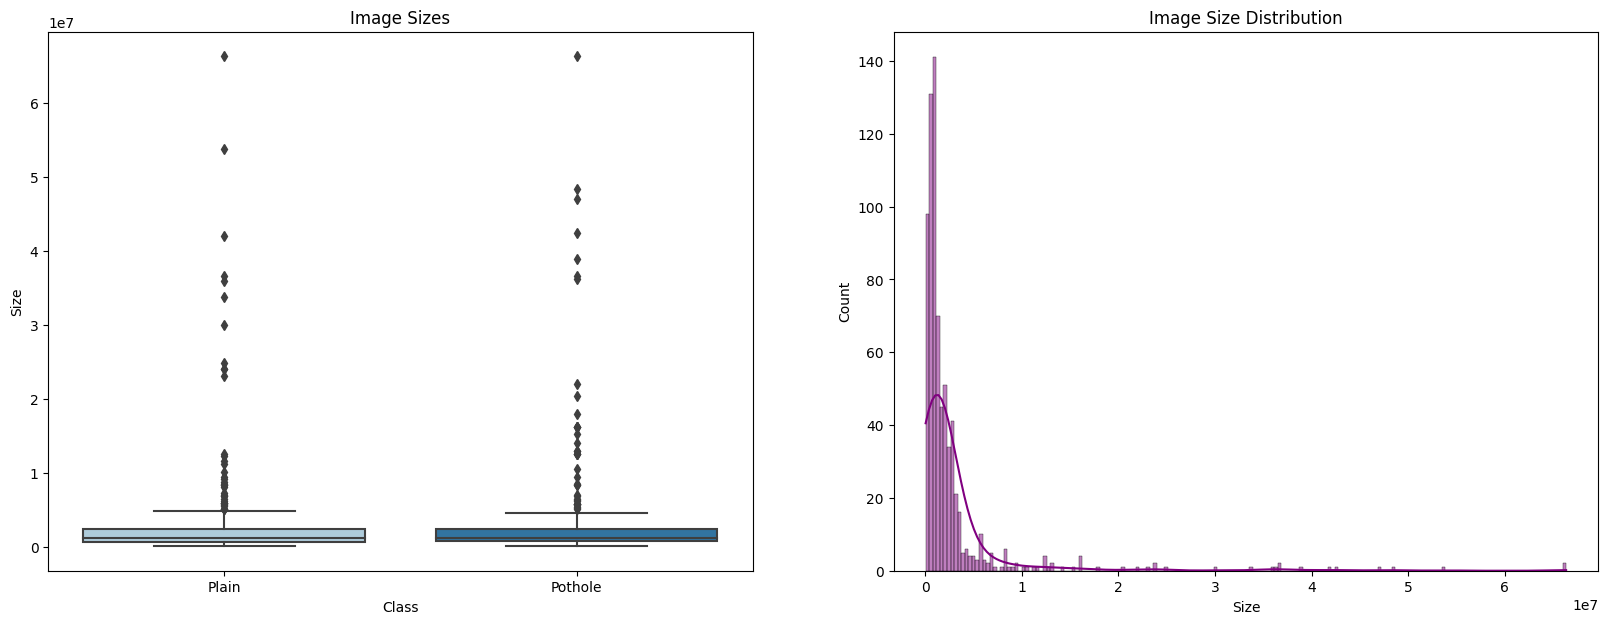

In [84]:
plt.figure(figsize=biplot_fig_size)
plt.subplot(1,2,1)
ax = sns.boxplot(data=data, x=data["Class"], y=data["Size"], palette=sns_pallete_paired)
plt.title("Image Sizes")

plt.subplot(1,2,2)
# plt.figure(figsize=custom_fig_size),
sns.histplot(data["Size"], color="purple", kde=True)
# plt.axvline(x=data["Size"].median(),
#             color='#52cbff',
#             ls='-', 
#             lw=1)
plt.title("Image Size Distribution")

plt.show()

In [85]:
print(f"Mean size: {data['Size'].mean().__round__(2)}")
print(f"Median of Size: {data['Size'].median().__round__(2)}")
print(f"Standard Dev of Size: {data['Size'].std().__round__(2)}")
print(f"Range of size in boxplot box: {data['Size'].quantile(0.25).__round__(2)} to {data['Size'].quantile(0.75).__round__(2)}")

Mean size: 2928799.66
Median of Size: 1158000.0
Standard Dev of Size: 6644059.18
Range of size in boxplot box: 721440.0 to 2394825.0


C:\Users\devbh\AppData\Local\Temp\ipykernel_7280\651684739.py:1: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.displot(data, x="Height", y="Width", hue="Class", palette=sns_pallete_paired)


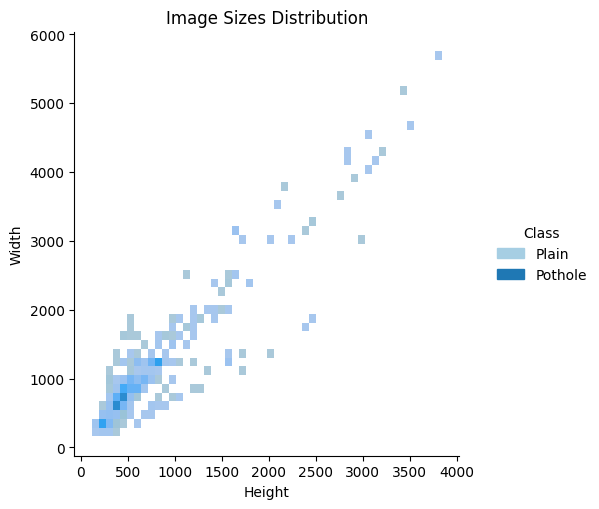

In [86]:
sns.displot(data, x="Height", y="Width", hue="Class", palette=sns_pallete_paired)
plt.title('Image Sizes Distribution')
plt.show()

C:\Users\devbh\AppData\Local\Temp\ipykernel_7280\4288972622.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(data=data, x="Height", y="Width", hue="Class", palette=sns_pallete_multiclass)
C:\Users\devbh\AppData\Local\Temp\ipykernel_7280\4288972622.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data, x="Height", hue="Class", kde=True, palette=sns_pallete_multiclass)  # Add KDE for better distribution visualization
C:\Users\devbh\AppData\Local\Temp\ipykernel_7280\4288972622.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data, x="Width", hue="Class", kde=True, palette=sns_pallete_multiclass)  # Add KDE for better distribution visualization


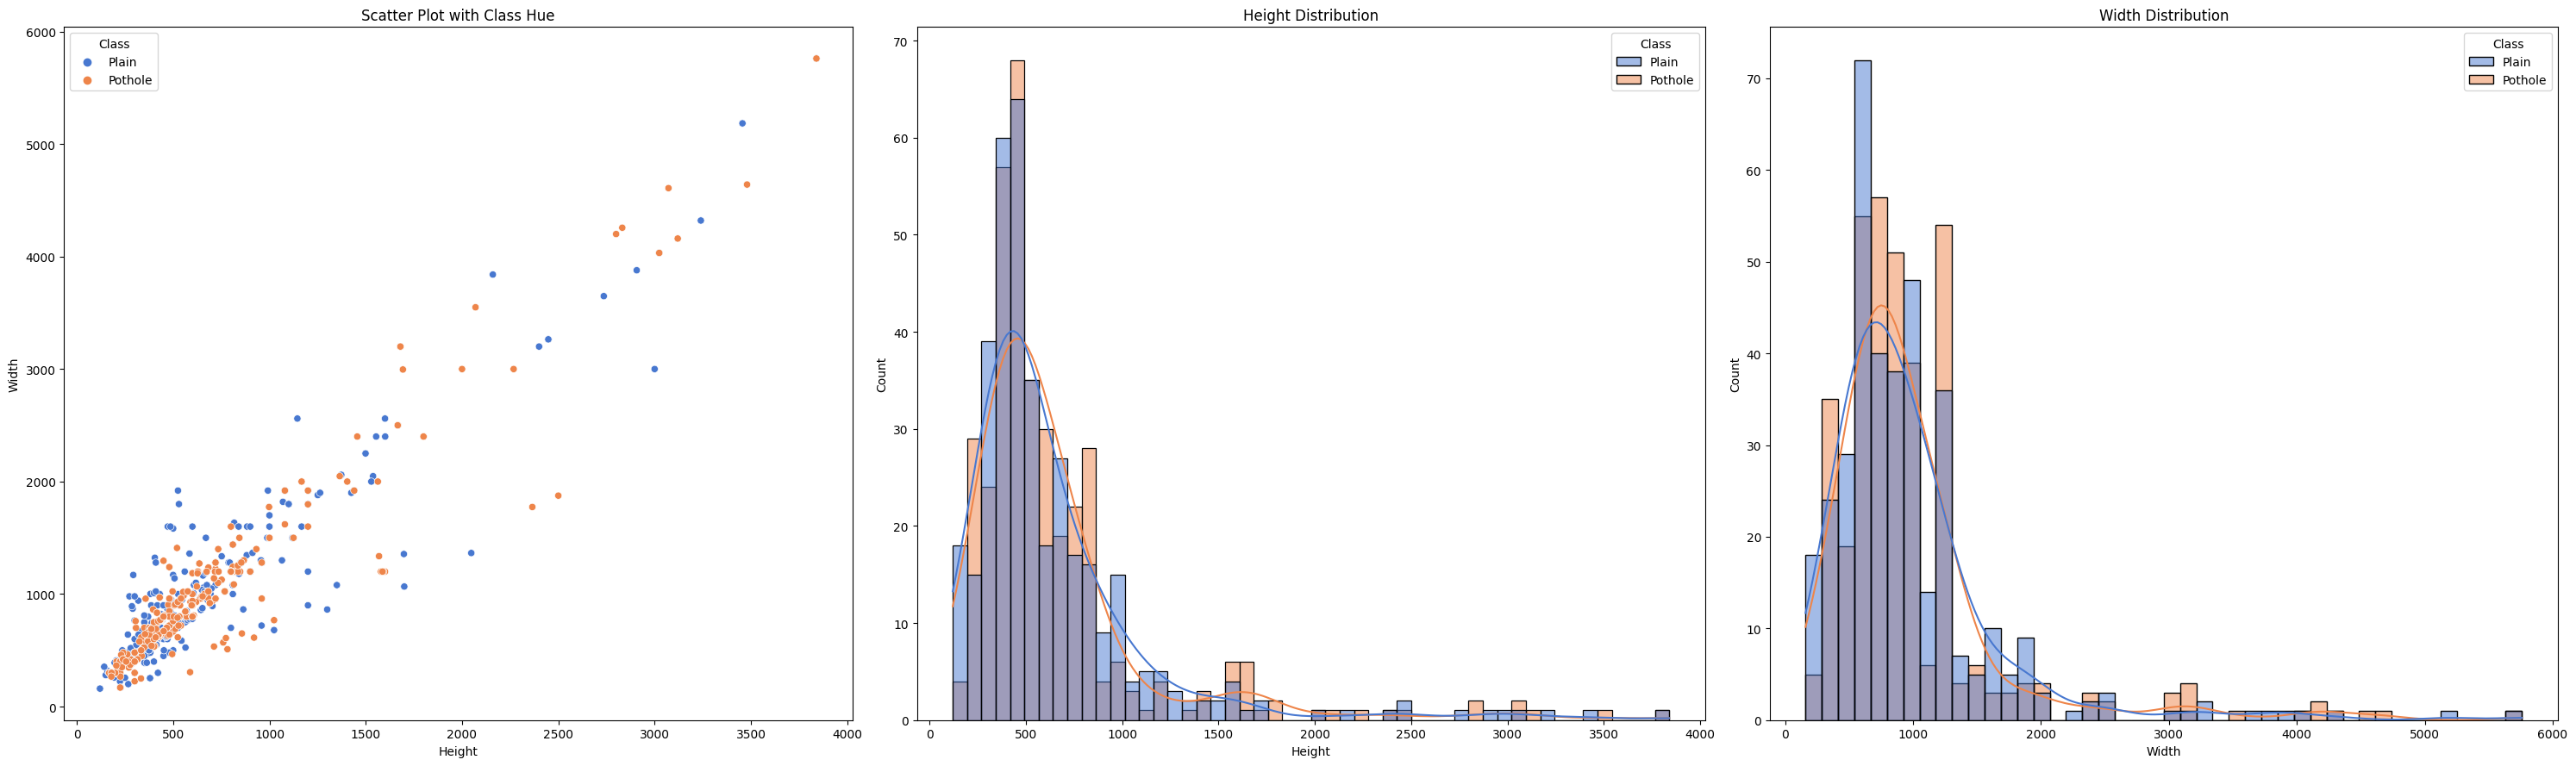

In [87]:
plt.figure(figsize=triplot_fig_size)

# Subplot 1: Scatter plot with hue
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x="Height", y="Width", hue="Class", palette=sns_pallete_multiclass)
plt.title('Scatter Plot with Class Hue')

# Subplot 2: Histogram for Height
plt.subplot(1, 3, 2)
sns.histplot(data=data, x="Height", hue="Class", kde=True, palette=sns_pallete_multiclass)  # Add KDE for better distribution visualization
plt.title('Height Distribution')

# Subplot 3: Histogram for Width
plt.subplot(1, 3, 3)
sns.histplot(data=data, x="Width", hue="Class", kde=True, palette=sns_pallete_multiclass)  # Add KDE for better distribution visualization
plt.title('Width Distribution')

plt.tight_layout()

plt.show()

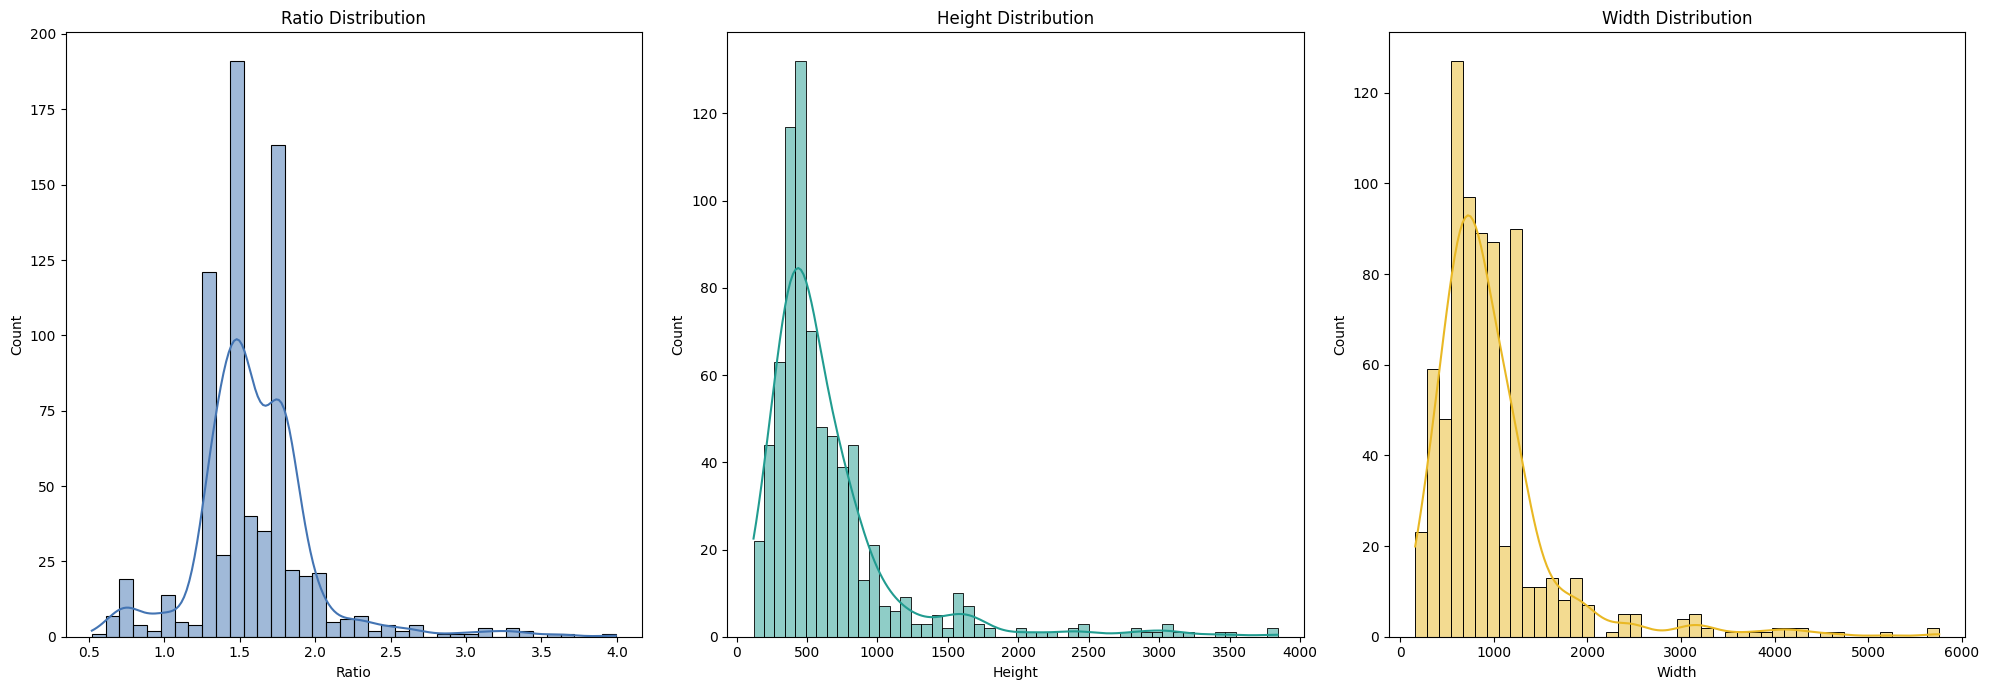

In [105]:
plt.figure(figsize=biplot_fig_size)

# Subplot 3: Histogram for Width
plt.subplot(1, 3, 1)
sns.histplot(data=data, x="Ratio", kde=True, color="#4374B3")  # Add KDE for better distribution visualization
plt.title('Ratio Distribution')

# Subplot 2: Histogram for Height
plt.subplot(1, 3, 2)
sns.histplot(data=data, x="Height", kde=True, color="#219C90")  # Add KDE for better distribution visualization
plt.title('Height Distribution')

# Subplot 3: Histogram for Width
plt.subplot(1, 3, 3)
sns.histplot(data=data, x="Width", kde=True, color="#E9B824")  # Add KDE for better distribution visualization
plt.title('Width Distribution')

plt.tight_layout()

plt.show()

In [97]:
mean_ratio = np.mean(data["Ratio"])
scale_height = np.mean(data["Height"])
scale_width = scale_height * mean_ratio
print(f"Height: {int(scale_height)}\nWidth: {int(scale_width)}")

Height: 645
Width: 1032
